# Calculating PI

Imagine, we have a square of size $1\times 1$ with a circle inside it with diameter of 1. \
If we drew a random point in $[x,y]$ in $[0,1]$, what would be the odds this point falls inside the circle?

$$P=\frac{\text{Area of Circle}}{\text{Area of Square}}=\frac{\pi (1^2/4)}{1^2} \rightarrow P=\frac{\pi}{4}$$

![alt text](Assets/square-dots.png)

We can calculate $P$ by **drawing** a large number of random points in the square and **counting** the number of points that fall inside the circle.

$$P=\frac{\text{Number of points inside the circle}}{\text{Total number of points}} \text{ , and then, } \pi=4P$$

## Simple implementation

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [4]:
#if the point (x,y) falls inside the circle of radius 0.5 centered at (0.5,0.5); true, otherwise, false
def xy_is_inside(x,y):
    x0=0.5
    y0=0.5
    r=np.sqrt((x-x0)**2+(y-y0)**2)
    
    if r<0.5:
        outcome=True
    else:
        outcome=False
    return outcome

<details>
<summary>Answer</summary>


```python
#if the point (x,y) falls inside the circle of radius 0.5 centered at (0.5,0.5); true, otherwise, false
def xy_is_inside(x,y):
    x0=0.5
    y0=0.5
    r=np.sqrt((x-x0)**2+(y-y0)**2)
    
    if r<0.5:
        outcome=True
    else:
        outcome=False
    return outcome
```

</details>

In [5]:
# must fix the seed, for reproducibility!
np.random.seed(8)

# how many points?
n=1000000

# draw uniform random numbers?
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)

In [6]:
# Use a for-loop to count the number of points inside the circle
num_inside=0
for i in range(0,n):
    if xy_is_inside(x[i],y[i]):
        num_inside=num_inside+1

In [7]:
# Calculate the numerical value of Pi
Pi_numerical=4.0*(num_inside/n)

# Print the results and compare with the reference value
print (f'Pi numerical={str(Pi_numerical)}')
print (f'Pi reference={str(np.pi)}')

Pi numerical=3.142344
Pi reference=3.141592653589793


## Vectorizing the nested for-loops

In [15]:
# how many points?
# n=1000000

# draw uniform random numbers?
# x = np.random.uniform(0, 1, n)
# y = np.random.uniform(0, 1, n)

# TODO:calculate the distance from the center of the circle
r_vec=np.sqrt((x-0.5)**2+(y-0.5)**2)

# how many points are inside the circle?
num_inside_vec=np.count_nonzero(r_vec<0.5)

<details>
<summary>Answer</summary>

```python
# calculate the distance from the center of the circle
r_vec=np.sqrt((x-0.5)**2+(y-0.5)**2)

# how many points are inside the circle?
num_inside_vec=np.count_nonzero(r_vec<0.5)
```

</details>

In [16]:
# Calculate the numerical value of Pi
Pi_numerical_vec=4.0*(num_inside_vec/n)

# Print the results and compare with the reference value
print (f'Pi numerical={str(Pi_numerical_vec)}')
print (f'Pi reference={str(np.pi)}')

Pi numerical=3.142344
Pi reference=3.141592653589793


## Performance measurement

Let's define two functions:
- `PI_forloop(n,seed=8)`: calculates Pi, end-to-end, using a for-loop
- `PI_vec(n,seed=8)`: calculates Pi, end-to-end, using vectorization

Later, we will time them both!








In [18]:
# calculate Pi using a for-loop
def PI_forloop(n,seed=8):
    #seed
    np.random.seed(8)
    
    # draw uniform random numbers?
    x = np.random.uniform(0, 1, n)
    y = np.random.uniform(0, 1, n)

    def xy_is_inside(x,y):
        x0=0.5
        y0=0.5
        r=np.sqrt((x-x0)**2+(y-y0)**2)
        
        if r<0.5:
            outcome=True
        else:
            outcome=False
        return outcome

    num_inside=0
    for i in range(0,n):
        if xy_is_inside(x[i],y[i]):
            num_inside=num_inside+1

    return 4.0*(num_inside/n)

<details>
<summary>Answer</summary>

```python
# calculate Pi using a for-loop
def PI_forloop(n,seed=8):
    #seed
    np.random.seed(seed)
    
    # draw random numbers?
    x = np.random.uniform(0, 1, n)
    y = np.random.uniform(0, 1, n)

    def xy_is_inside(x,y):
        x0=0.5
        y0=0.5
        r=np.sqrt((x-x0)**2+(y-y0)**2)
        
        if r<0.5:
            outcome=True
        else:
            outcome=False
        return outcome

    num_inside=0
    for i in range(0,n):
        if xy_is_inside(x[i],y[i]):
            num_inside=num_inside+1

    return 4.0*(num_inside/n)
```

In [19]:
# calculate Pi using vectorization
def PI_vectorized(n,seed=8):
    #seed
    np.random.seed(seed)
    
    # draw random numbers?
    x = np.random.uniform(0, 1, n)
    y = np.random.uniform(0, 1, n)
    
    r_vec=np.sqrt((x-0.5)**2+(y-0.5)**2)
    num_inside_vec=np.count_nonzero(r_vec<0.5)
    
    return 4.0*(num_inside_vec/n)

<details>
<summary>Answer</summary>

```python
# calculate Pi using vectorization
def PI_vectorized(n,seed=8):
    #seed
    np.random.seed(seed)
    
    # draw random numbers?
    x = np.random.uniform(0, 1, n)
    y = np.random.uniform(0, 1, n)

    r_vec=np.sqrt((x-0.5)**2+(y-0.5)**2)
    num_inside_vec=np.count_nonzero(r_vec<0.5)
    
    return 4.0*(num_inside_vec/n)
```
</details>

In [26]:
PI_forloop(n)

3.142344

In [27]:
print(PI_vectorized(n))

3.142344


We can use:
- `%%timeit` to time a single cell in a jupyter notebook
- `%timeit` to time a single line in a python script

**Example:**

```
%%timeit <line of code>
```

**Explanation of the output:**

`user`:      The time spent by the CPU executing user instructions (i.e., code written in Python)\
`sys`:       The time spent by the CPU executing system (kernel) instructions on behalf of your code\
`Wall time`: The actual elapsed time from start to end of the execution, also known as "real time" or "clock time", including for I/O operations \

The slight inconsistency is due to OS, different measurement accuracies, etc


### Let's time them both, consider n=10,000,000

In [28]:
n=int(1e7)

print('Time taken with for-loop')
%time PI_forloop(n)
print('---')
print('Time taken with vectorization')
%time PI_vectorized(n)

Time taken with for-loop
CPU times: user 11.8 s, sys: 4.88 ms, total: 11.8 s
Wall time: 11.8 s
---
Time taken with vectorization
CPU times: user 150 ms, sys: 22.9 ms, total: 173 ms
Wall time: 173 ms


3.1411904

### More accurate time measurement using `%%timeit`

`-n 5`: how many loops \
`-r 2`: how many iteration for each loop

In [20]:
# let's reduce the number of points
n=int(1e6)

In [29]:
%%timeit -n 5 -r 2

# approach 1: using for-loop
PI_forloop(n)

11.8 s ± 57.6 ms per loop (mean ± std. dev. of 2 runs, 5 loops each)


In [30]:
%%timeit -n 5 -r 2

# approach 2: using vectorization
PI_vectorized(n)

171 ms ± 520 ns per loop (mean ± std. dev. of 2 runs, 5 loops each)


In [31]:
from time import perf_counter

start_time = perf_counter()
PI_forloop(n)
print(f"For-loop:Time taken: {perf_counter() - start_time} seconds")

start_time = perf_counter()
PI_vectorized(n)
print(f"Vectorized:Time taken: {perf_counter() - start_time} seconds")

For-loop:Time taken: 11.709404938970692 seconds
Vectorized:Time taken: 0.17112899792846292 seconds


## Plot the dots and circle

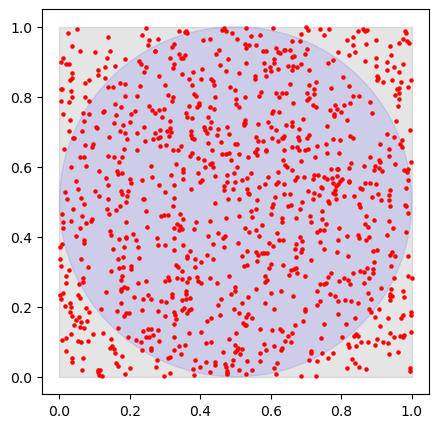

3.16

In [35]:
def PI_vectorized(n,seed=8):
    #seed
    np.random.seed(seed)
    
    # draw random numbers?
    x = np.random.uniform(0, 1, n)
    y = np.random.uniform(0, 1, n)

    r_vec=np.sqrt((x-0.5)**2+(y-0.5)**2)
    num_inside_vec=np.count_nonzero(r_vec<0.5)

    # simply plotting
    f,ax=plt.subplots(figsize=(5,5))

    # plot the square first
    square = plt.Rectangle((0, 0), 1, 1, color='k', alpha=0.1)
    ax.add_patch(square)

    # plot the circle
    circle = plt.Circle((0.5, 0.5), 0.5, color='b', alpha=0.1)
    ax.add_patch(circle)
    
    # plot the dots
    ax.scatter(x,y,color='r',s=5)
    plt.show()
        
    return 4.0*(num_inside_vec/n)

PI_vectorized(1000)